<a href="https://colab.research.google.com/github/lreinosoh/Anexos_PG/blob/main/Anexo_F_Exploraci%C3%B3n_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from numpy.lib.shape_base import tile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
notas_t = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V7.xlsx")#Carga de Datos
#notas_t.head(5)

In [ ]:
notas_t.shape

(48770, 42)

In [ ]:
notas_t['CARRERA'].value_counts()

CARRERA
INGENIERÍA DE SISTEMAS    48770
Name: count, dtype: int64

In [ ]:
notas_t.isnull().sum()

PLAN 4064                             0
PERIODO                               0
CARRERA                               0
DEPARTAMENTO_DEDICACION               0
CÓDIGO                                0
ASIGNATURA                            0
CRÉDITOS TEÓRICOS                     0
PREREQUISITO1_COD                 33499
PREREQUISITO1_ASIGNATURA          33499
NOTA DEFINITIVA PREREQUISITO 1    35491
PREREQUISITO2_COD                 44660
PREREQUISITO2_ASIGNATURA          44660
NOTA DEFINITIVA PREREQUISITO 2    45018
GRUPO                              4194
DESCRIPCIÓN                           0
DEPARTAMENTO PROFESOR                21
DOCUMENTO DOCENTE                     0
PRIMER APELLIDO DOCENTE               0
SEGUNDO APELLIDO DOCENTE           2135
NOMBRE DOCENTE                        0
DOCUMENTO ESTUDIANTE                  0
PRIMER APELLIDO                       0
SEGUNDO APELLIDO                    130
NOMBRE                                0
GÉNERO                                0


In [ ]:
print(notas_t.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48770 entries, 0 to 48769
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       48770 non-null  object 
 1   PERIODO                         48770 non-null  object 
 2   CARRERA                         48770 non-null  object 
 3   DEPARTAMENTO_DEDICACION         48770 non-null  object 
 4   CÓDIGO                          48770 non-null  int64  
 5   ASIGNATURA                      48770 non-null  object 
 6   CRÉDITOS TEÓRICOS               48770 non-null  int64  
 7   PREREQUISITO1_COD               15271 non-null  float64
 8   PREREQUISITO1_ASIGNATURA        15271 non-null  object 
 9   NOTA DEFINITIVA PREREQUISITO 1  13279 non-null  float64
 10  PREREQUISITO2_COD               4110 non-null   float64
 11  PREREQUISITO2_ASIGNATURA        4110 non-null   object 
 12  NOTA DEFINITIVA PREREQUISITO 2  

In [ ]:
print(notas_t.isnull().sum())

PLAN 4064                             0
PERIODO                               0
CARRERA                               0
DEPARTAMENTO_DEDICACION               0
CÓDIGO                                0
ASIGNATURA                            0
CRÉDITOS TEÓRICOS                     0
PREREQUISITO1_COD                 33499
PREREQUISITO1_ASIGNATURA          33499
NOTA DEFINITIVA PREREQUISITO 1    35491
PREREQUISITO2_COD                 44660
PREREQUISITO2_ASIGNATURA          44660
NOTA DEFINITIVA PREREQUISITO 2    45018
GRUPO                              4194
DESCRIPCIÓN                           0
DEPARTAMENTO PROFESOR                21
DOCUMENTO DOCENTE                     0
PRIMER APELLIDO DOCENTE               0
SEGUNDO APELLIDO DOCENTE           2135
NOMBRE DOCENTE                        0
DOCUMENTO ESTUDIANTE                  0
PRIMER APELLIDO                       0
SEGUNDO APELLIDO                    130
NOMBRE                                0
GÉNERO                                0


In [ ]:
total_datos_faltantes = notas_t.isnull().sum().sum()
print(total_datos_faltantes)


420148


In [ ]:
print(notas_t['DEFINITIVA'].describe())

count    42305.000000
mean         3.516779
std          0.942625
min          0.000000
25%          3.130000
50%          3.650000
75%          4.150000
max          5.000000
Name: DEFINITIVA, dtype: float64


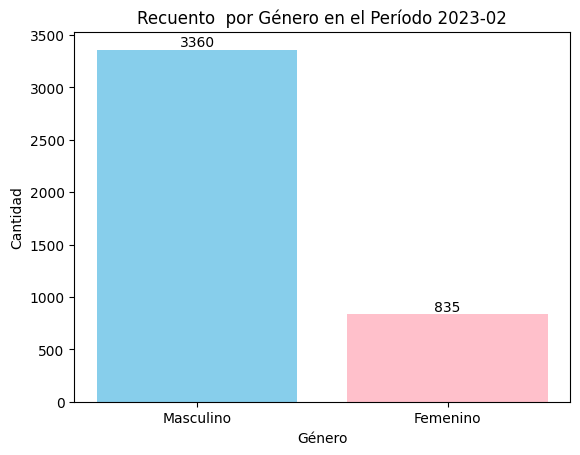

In [ ]:
import matplotlib.pyplot as plt

# Filtrar por período igual a '2023-2'
data_filtrado = notas_t[notas_t['PERIODO'] == '2024-01']

# Contar el número de registros por género
conteo_por_genero = data_filtrado['GÉNERO'].value_counts()

# Crear un gráfico de barras
bars = plt.bar(conteo_por_genero.index, conteo_por_genero.values, color=['skyblue', 'pink'])

# Agregar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Recuento  por Género en el Período 2023-02')

# Agregar el total en cada barra
for bar, count in zip(bars, conteo_por_genero.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
import plotly.express as px

# Filtrar por período igual a '2024-01'
data_filtrado = notas_t[notas_t['PERIODO'] == '2024-01']

# Contar el número de registros por género
conteo_por_genero = data_filtrado['GÉNERO'].value_counts()

# Definir una paleta de colores pastel
colores_pastel = ['#ADD8E6', '#FFB6C1', '#90EE90', '#FFDAB9', '#87CEFA', '#B0C4DE', '#FFFFE0']

# Crear un gráfico de barras interactivo con Plotly
fig = px.bar(x=conteo_por_genero.index, y=conteo_por_genero.values,
             color=conteo_por_genero.index,
             labels={'x':'Género', 'y':'Cantidad'},
             title='Conteo por Género en el Período 2024-01',
             text=conteo_por_genero.values,
             color_discrete_sequence=colores_pastel)  # Aplicar la paleta de colores pastel

# Actualizar el diseño del gráfico
fig.update_traces(textposition='outside')
fig.update_layout(width=600, height=470)  # Ajustar tamaño del gráfico

# Mostrar el gráfico
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Suponiendo que 'df' es tu DataFrame y ya contiene los datos

# Filtrar por el período específico
data_filtrada = notas_t[notas_t['PERIODO'] == '2023-02']

# Contar el número de registros por género y calificación
conteo = data_filtrada.groupby(['GÉNERO', 'CALIFICACIÓN']).size().reset_index(name='Cantidad')

# Crear el gráfico de barras interactivo con Plotly
fig = px.bar(conteo, x='GÉNERO', y='Cantidad', color='CALIFICACIÓN',
             barmode='group',
             title='Cantidad de Estudiantes por Género y Calificación en el Período 2023-02',
             labels={'GÉNERO': 'Género', 'Cantidad': 'Cantidad', 'CALIFICACIÓN': 'Calificación'})

# Actualizar el diseño del gráfico
fig.update_layout(xaxis_title='Género',
                  yaxis_title='Número de Estudiantes',
                  legend_title='Calificación')

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Suponiendo que 'df' es tu DataFrame y ya contiene los datos

# Filtrar por el período específico
data_filtrada = notas_t[notas_t['PERIODO'] == '2023-02']

# Contar el número de registros por género y calificación
conteo = data_filtrada.groupby(['GÉNERO', 'CALIFICACIÓN']).size().reset_index(name='Cantidad')

# Calcular el total por género para el cálculo del porcentaje
total_por_genero = conteo.groupby('GÉNERO')['Cantidad'].transform('sum')

# Calcular el porcentaje
conteo['Porcentaje'] = (conteo['Cantidad'] / total_por_genero * 100).round(1)

# Crear el gráfico de barras interactivo con Plotly
fig = px.bar(conteo, x='GÉNERO', y='Cantidad', color='CALIFICACIÓN',
             text=conteo['Porcentaje'].apply(lambda x: f'{x}%'),
             barmode='group',
             title='Porcentaje de Estudiantes por Género y Calificación en el Período 2023-02',
             labels={'GÉNERO': 'Género', 'Cantidad': 'Cantidad', 'CALIFICACIÓN': 'Calificación'})

# Actualizar el diseño del gráfico
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Género',
                  yaxis_title='Número de Estudiantes',
                  legend_title='Calificación',
                  width=600,
                  height=500)

# Mostrar el gráfico
fig.show()


In [ ]:
# Obtener el mayor promedio semestral para hombres y mujeres por separado
mayor_promedio_hombres = data_filtrado[data_filtrado['GÉNERO'] == 'Masculino']['PROMEDIO SEMESTRAL'].max()
mayor_promedio_mujeres = data_filtrado[data_filtrado['GÉNERO'] == 'Femenino']['PROMEDIO SEMESTRAL'].max()

# Filtrar los datos para obtener solo los registros con el mayor promedio semestral para hombres y mujeres
mejor_promedio_hombres = data_filtrado[(data_filtrado['GÉNERO'] == 'Masculino') & (data_filtrado['PROMEDIO SEMESTRAL'] == mayor_promedio_hombres)]
mejor_promedio_mujeres = data_filtrado[(data_filtrado['GÉNERO'] == 'Femenino') & (data_filtrado['PROMEDIO SEMESTRAL'] == mayor_promedio_mujeres)]

# Contar el número de hombres y mujeres con el mayor promedio semestral
cantidad_hombres = len(mejor_promedio_hombres)
cantidad_mujeres = len(mejor_promedio_mujeres)

# Imprimir los resultados
print("Número de hombres con el mayor promedio semestral:", cantidad_hombres)
print("Número de mujeres con el mayor promedio semestral:", cantidad_mujeres)


Número de hombres con el mayor promedio semestral: 2
Número de mujeres con el mayor promedio semestral: 5


In [ ]:
# Filtrar los datos para obtener solo los registros de hombres y mujeres con CALIFICACIÓN 'NS' o 'SP'
hombres_NS = data_filtrado[(data_filtrado['GÉNERO'] == 'Masculino') & (data_filtrado['CALIFICACIÓN'] == 'NS')]
mujeres_NS = data_filtrado[(data_filtrado['GÉNERO'] == 'Femenino') & (data_filtrado['CALIFICACIÓN'] == 'NS')]
hombres_SP = data_filtrado[(data_filtrado['GÉNERO'] == 'Masculino') & (data_filtrado['CALIFICACIÓN'] == 'SP')]
mujeres_SP = data_filtrado[(data_filtrado['GÉNERO'] == 'Femenino') & (data_filtrado['CALIFICACIÓN'] == 'SP')]

# Contar el número de hombres y mujeres con CALIFICACIÓN 'NS' y 'SP'
cantidad_hombres_NS = len(hombres_NS)
cantidad_mujeres_NS = len(mujeres_NS)
cantidad_hombres_SP = len(hombres_SP)
cantidad_mujeres_SP = len(mujeres_SP)

# Imprimir los resultados
print("Cantidad de hombres con CALIFICACIÓN 'NS':", cantidad_hombres_NS)
print("Cantidad de mujeres con CALIFICACIÓN 'NS':", cantidad_mujeres_NS)
print("Cantidad de hombres con CALIFICACIÓN 'SP':", cantidad_hombres_SP)
print("Cantidad de mujeres con CALIFICACIÓN 'SP':", cantidad_mujeres_SP)


Cantidad de hombres con CALIFICACIÓN 'NS': 1
Cantidad de mujeres con CALIFICACIÓN 'NS': 0
Cantidad de hombres con CALIFICACIÓN 'SP': 14
Cantidad de mujeres con CALIFICACIÓN 'SP': 2


In [ ]:
import plotly.express as px
import pandas as pd



# Crear un DataFrame con los datos de calificaciones 'NS' y 'SP' por género
data_calificaciones = pd.DataFrame({
    'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino'],
    'Calificación': ['NS', 'NS', 'SP', 'SP'],
    'Cantidad': [cantidad_hombres_NS, cantidad_mujeres_NS, cantidad_hombres_SP, cantidad_mujeres_SP],
    'Total': [cantidad_hombres_NS + cantidad_hombres_SP, cantidad_mujeres_NS + cantidad_mujeres_SP,
              cantidad_hombres_NS + cantidad_hombres_SP, cantidad_mujeres_NS + cantidad_mujeres_SP]
})

# Crear un gráfico de barras con Plotly Express
fig = px.bar(data_calificaciones, x='Género', y='Cantidad', color='Calificación',
             text='Cantidad', pattern_shape='Calificación', pattern_shape_sequence=["x", "+"],
             title='Cantidad de Hombres y Mujeres con Calificaciones NS y SP',
             labels={'Cantidad': 'Cantidad de Estudiantes'})

# Añadir anotaciones de texto con los totales para cada género
for idx, row in data_calificaciones.iterrows():
    fig.add_annotation(x=row['Género'], y=row['Cantidad'],
                       text=f"({row['Total']})",
                       showarrow=False, yshift=10)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Filtrar por período igual a '2024-01'
data_filtrado = notas_t[notas_t['PERIODO'] == '2023-02']

# Contar el número de registros por género
conteo_por_genero = data_filtrado['GÉNERO'].value_counts().reset_index()
conteo_por_genero.columns = ['Género', 'Cantidad']



# Crear un gráfico de barras interactivo con Plotly
fig = px.bar(conteo_por_genero, x='Género', y='Cantidad',
             text='Cantidad',
             labels={'Género': 'Género', 'Cantidad': 'Cantidad'},
             title='Recuento por Género en el Período 2024-01',
             color='Género',
             color_discrete_map={'Masculino': '#ADD8E6', 'Femenino': '#FFB6C1'})

# Actualizar el diseño del gráfico
fig.update_traces(textposition='outside')
fig.update_layout(width=600, height=470)  # Ajustar tamaño del gráfico

# Mostrar el gráfico
fig.show()



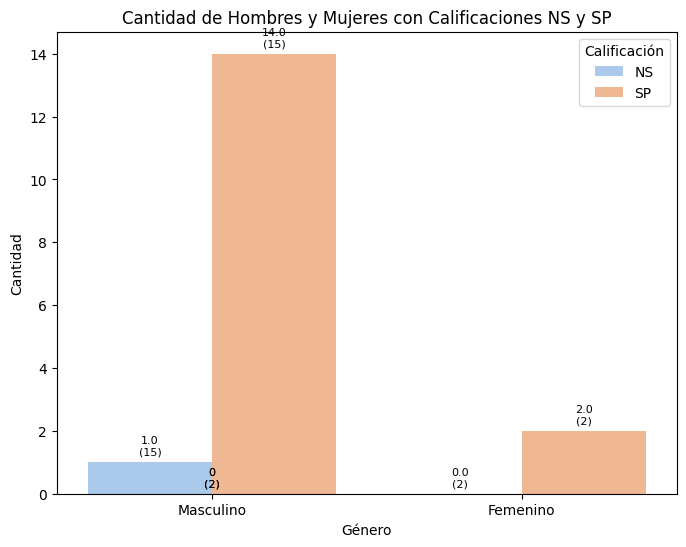

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular totales por género directamente en el DataFrame
data_calificaciones = pd.DataFrame({
    'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino'],
    'Calificación': ['NS', 'NS', 'SP', 'SP'],
    'Cantidad': [cantidad_hombres_NS, cantidad_mujeres_NS, cantidad_hombres_SP, cantidad_mujeres_SP],
    'Total': [cantidad_hombres_NS + cantidad_hombres_SP, cantidad_mujeres_NS + cantidad_mujeres_SP,
              cantidad_hombres_NS + cantidad_hombres_SP, cantidad_mujeres_NS + cantidad_mujeres_SP]
})

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data_calificaciones, x='Género', y='Cantidad', hue='Calificación', palette='pastel')

# Agregar etiquetas de totales en las barras
for p in ax.patches:
    height = p.get_height()
    total = data_calificaciones.loc[data_calificaciones['Cantidad'] == height, 'Total'].values[0]
    ax.annotate(f'{height}\n({total})',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center',
                fontsize=8)

plt.title('Cantidad de Hombres y Mujeres con Calificaciones NS y SP')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Calificación')
plt.show()


In [ ]:
print(notas_t['CALIFICACIÓN'].unique())

['SP' 'NS' 'PF' 'IN' nan]


In [ ]:
notas_t.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
datos1 = notas_t.copy()
datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'SP' else 0)

datos1['NO_APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'NS' else 0)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')



columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)


datos1.head(5)


,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,0,0,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,0,0,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,0,0,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,0,0,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,0,0,1


In [ ]:
import pandas as pd

# Supongamos que notas_t es tu DataFrame original y lo copias en datos1
datos1 = notas_t.copy()

# Filtrar los datos para incluir solo aquellos que pertenecen al plan '4064'
datos1 = datos1[datos1['PLAN 4064'] == 'SI']

# Normalizar la columna 'CALIFICACIÓN' para manejar valores no estándar y nulos
datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN': 'NS'}, inplace=True)
datos1['CALIFICACIÓN'].fillna('NS', inplace=True)
datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)
datos1['APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'SP' else 0)
datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')

# Eliminar columnas que no necesitas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO1_ASIGNATURA', 'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
                   'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE',
                   'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
                   'TIPO INGRESO', 'SUBACCESO', 'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE',
                   'FALLAS SEGUNDO CORTE', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS',
                   'PERDIDA FALLAS']
datos1 = datos1.drop(columns=columns_to_drop)

# Eliminar duplicados basados en 'DOCUMENTO ESTUDIANTE' y 'PERIODO'
datos_unicos = datos1.drop_duplicates(subset=['DOCUMENTO ESTUDIANTE', 'PERIODO'])

# Contar el número de estudiantes únicos por período
conteo_por_periodo = datos_unicos.groupby('PERIODO').size()

# Imprimir el resultado
print(conteo_por_periodo)


PERIODO
2014-01     34
2014-02     35
2015-01     26
2015-02     21
2016-01     33
2016-02      5
2017-01     23
2017-02      9
2018-01     57
2018-02    145
2019-01    166
2019-02    233
2020-01    257
2020-02    299
2021-01    329
2021-02    403
2022-01    427
2022-02    531
2023-01    596
2023-02    677
2024-01    669
dtype: int64


In [ ]:
datos1.dtypes

PLAN 4064                          object
PERIODO                            object
CARRERA                            object
CÓDIGO                              int64
ASIGNATURA                         object
NOTA DEFINITIVA PREREQUISITO 1    float64
NOTA DEFINITIVA PREREQUISITO 2    float64
DOCUMENTO ESTUDIANTE                int64
NOTAS PRIMER CORTE                float64
PROMEDIO PARCIAL                  float64
DEFINITIVA                        float64
CALIFICACIÓN                        int64
ASIGNATURA ANULADA                 object
PROMEDIO SEMESTRAL                float64
PROMEDIO ACUMULADO                float64
APROBARON                           int64
NO_APROBARON                        int64
TOTAL_MATRICULADOS                  int64
dtype: object

In [ ]:
tipos_de_datos = datos1.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 5
Columnas Cuantitativas (Numéricas): 13


In [ ]:
valores_periodo = datos1['PERIODO'].unique()

# Muestra los valores únicos
print(valores_periodo)

['2014-01' '2014-02' '2015-01' '2015-02' '2016-01' '2016-02' '2017-01'
 '2017-02' '2018-01' '2018-02' '2019-01' '2019-02' '2020-01' '2020-02'
 '2021-01' '2021-02' '2022-01' '2022-02' '2023-01' '2023-02' '2024-01']


In [ ]:
datos1.shape

(10425, 18)

In [ ]:
datos1.dtypes

PLAN 4064                          object
PERIODO                            object
CARRERA                            object
CÓDIGO                              int64
ASIGNATURA                         object
NOTA DEFINITIVA PREREQUISITO 1    float64
NOTA DEFINITIVA PREREQUISITO 2    float64
DOCUMENTO ESTUDIANTE                int64
NOTAS PRIMER CORTE                float64
PROMEDIO PARCIAL                  float64
DEFINITIVA                        float64
CALIFICACIÓN                        int64
ASIGNATURA ANULADA                 object
PROMEDIO SEMESTRAL                float64
PROMEDIO ACUMULADO                float64
APROBARON                           int64
NO_APROBARON                        int64
TOTAL_MATRICULADOS                  int64
dtype: object

In [ ]:
IS2 = datos1[(datos1['CÓDIGO'] == 43390853) & (datos1['PERIODO'] != '2023-02')]
IS2.dtypes

PLAN 4064                          object
PERIODO                            object
CARRERA                            object
CÓDIGO                              int64
ASIGNATURA                         object
NOTA DEFINITIVA PREREQUISITO 1    float64
NOTA DEFINITIVA PREREQUISITO 2    float64
DOCUMENTO ESTUDIANTE                int64
NOTAS PRIMER CORTE                float64
PROMEDIO PARCIAL                  float64
DEFINITIVA                        float64
CALIFICACIÓN                        int64
ASIGNATURA ANULADA                 object
PROMEDIO SEMESTRAL                float64
PROMEDIO ACUMULADO                float64
dtype: object